In [1]:
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

In [2]:
detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor('models/shape_predictor_68_face_landmarks.dat')
face_recognizer = dlib.face_recognition_model_v1('models/dlib_face_recognition_resnet_model_v1.dat')

In [3]:
def find_faces(img):
    dets = detector(img, 1)

    if len(dets) == 0:
        return np.empty(0), np.empty(0), np.empty(0)
    
    rects, shapes = [], []
    shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int)
    for k, d in enumerate(dets):
        rect = ((d.left(), d.top()), (d.right(), d.bottom()))
        rects.append(rect)

        shape = landmark_predictor(img, d)
        
        # convert dlib shape to numpy array
        for i in range(0, 68):
            shapes_np[k][i] = (shape.part(i).x, shape.part(i).y)

        shapes.append(shape)
        
    return rects, shapes, shapes_np

def encode_faces(img, shapes):
    face_descriptors = []
    for shape in shapes:
        face_descriptor = face_recognizer.compute_face_descriptor(img, shape)
        face_descriptors.append(np.array(face_descriptor))

    return np.array(face_descriptors)

In [4]:
img_paths = {
    'Toilet': 'data/daddy4.png',
}

descs = {
    'Toilet': None
}

for name, img_path in img_paths.items():
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    _, img_shapes, _ = find_faces(img_rgb)
    descs[name] = encode_faces(img_rgb, img_shapes)[0]

np.save('data/descs3.npy', descs)
print(descs)

{'Toilet': array([-0.09447734,  0.039384  ,  0.18295757,  0.01713368, -0.0586485 ,
       -0.02346576, -0.05078508, -0.13220115,  0.02930682, -0.13425379,
        0.25566414, -0.05654124, -0.14576192, -0.10280012, -0.09174181,
        0.19059266, -0.1858514 , -0.12702735, -0.07491746, -0.06943492,
        0.12464901,  0.06095453,  0.01404268, -0.08609513, -0.08208183,
       -0.30213535, -0.07334993, -0.03884035,  0.12069322, -0.02319587,
       -0.03237806, -0.00414004, -0.22525369, -0.05336013,  0.04683475,
        0.07436404, -0.03595778, -0.08931139,  0.16757795, -0.01350954,
       -0.17790814,  0.08279197,  0.0259732 ,  0.22663794,  0.21873005,
        0.00977204,  0.00525491, -0.12963825,  0.12797166, -0.16825858,
       -0.01441402,  0.15083428,  0.08338247,  0.0919961 ,  0.0414528 ,
       -0.04706099,  0.0417929 ,  0.12856585, -0.06398177,  0.01494581,
        0.12029427, -0.06827932,  0.03379636, -0.09778696,  0.13648872,
       -0.05534051, -0.0873    , -0.21843506,  0.1141

In [5]:
img_bgr = cv2.imread('data/test.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_rgb)
descriptors = encode_faces(img_rgb, shapes)

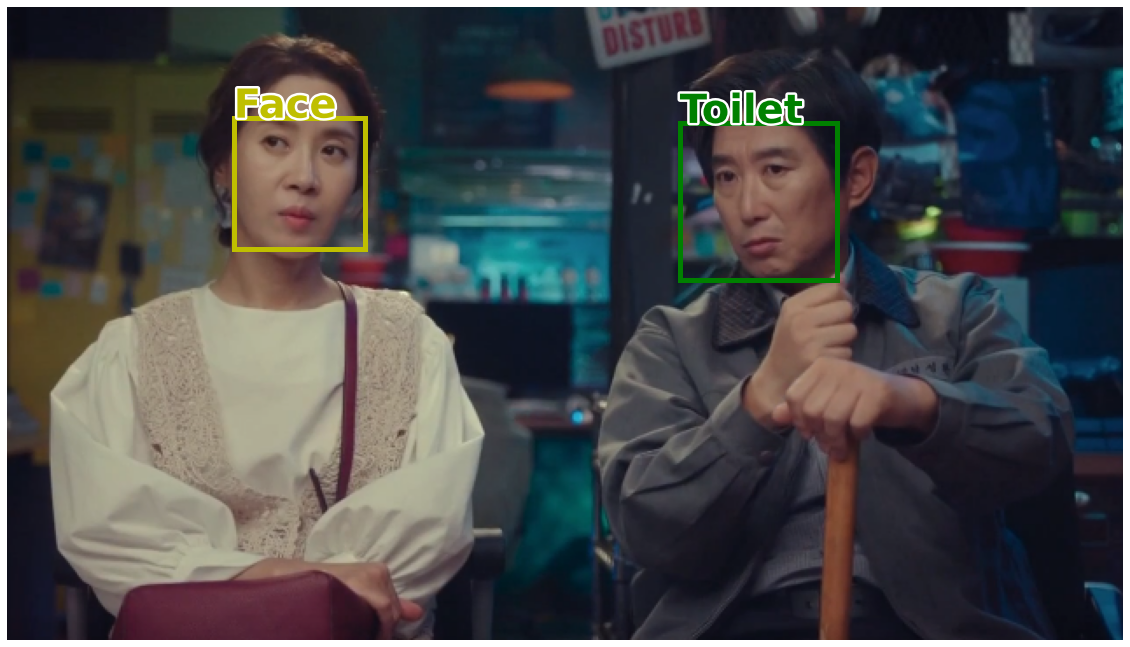

In [6]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    
    found = False
    for name, saved_desc in descs.items():
        dist = np.linalg.norm([desc] - saved_desc, axis=1)

        if dist < 0.45:
            found = True

            text = ax.text(rects[i][0][0], rects[i][0][1], name,
                    color='g', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=5, foreground='white'), path_effects.Normal()])
            rect = patches.Rectangle(rects[i][0],
                                 rects[i][1][1] - rects[i][0][1],
                                 rects[i][1][0] - rects[i][0][0],
                                 linewidth=5, edgecolor='g', facecolor='none')
            ax.add_patch(rect)

            break
    
    if not found:
        text = ax.text(rects[i][0][0], rects[i][0][1], 'Face',
                color='y', fontsize=40, fontweight='bold')
        text.set_path_effects([path_effects.Stroke(linewidth=5, foreground='white'), path_effects.Normal()])
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             linewidth=5, edgecolor='y', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.savefig('output/test_output2.png')
plt.show()